# <i><b> PASSION PROJECT </b></i>
# PROBLEM STATEMENT:
Mobile money services in Ghana have recently gained popularity since they do not require any non-necessities of banking systems.
However, with the advancement in the use of Mobile money there has also been an increase in the cases of mobile money fraud leading to huge loss and stress in our community Muoso and Ghana at Large.
The high incidences of mobile money fraud continue to rise in our community hence becoming a major detriment to the safety and credibility of our members.

Although many people use mobile money services due to the flexibility that comes with mobile money services, there is a high level of fraud activities due to poor fraud prevention and detection mechanisms.
#It means that special focus should be paid immediately to define the major drivers contributing to the growth of fraud risks and to find the most suitable solutions to minimize these risks.


# OBJECTIVES:
To identify and analyze patterns and trends in mobile money fraud incidents within the community.  <br>
To determine the key factors contributing to the high rate of mobile money fraud.<br>
To assess the effectiveness of mobile money service providers' current fraud prevention and detection measures.<br>
To develop and recommend actionable solutions to reduce mobile money fraud and enhance the security of mobile money transactions<br>

In [26]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [27]:
survey_data=pd.read_excel("momo_survey.csv")
survey_data.head(10)

,Age,Gender,Highest Educational Level,Mobile Network Provider,Frequency of Mobile Money Use,Types of Transactions,Has Experienced Mobile Money Fraud,Type of Fraud Encountered,How Fraud was Detected,Reported the Fraud,To Whom Fraud was Reported,Resolution,Security Features Used,Preventative Actions Taken After Fraud
0,25,Male,Bachelor's,MTN,Daily,Sending Money,Yes,Phishing,Bank Alert,Yes,Mobile Network Provider,No,PIN,Changed PIN
1,34,Female,Master's,MTN,Daily,Sending Money,Yes,Fake Promotions,Suspicious Activity,No,No One,No,PIN,Changed PIN
2,18,Male,High School,MTN,Daily,Sending Money,Yes,Fake Promotions,Missing Money,No,No One,No,PIN,Changed PIN
3,45,Male,PhD,MTN,Daily,Sending Money,Yes,Fake Promotions,Missing Money,No,No One,No,Transaction Alerts,Changed PIN
4,50,Male,PhD,MTN,Daily,Buying Goods,Yes,Fake Promotions,Missing Money,No,No One,No,PIN,Changed PIN
5,65,Male,High School,MTN,Daily,Sending Money,Yes,Fake Promotions,Missing Money,No,No One,No,PIN,Changed PIN
6,40,Female,Basic School,Vodafone,Daily,Sending Money,Yes,Phishing,Missing Money,No,No One,No,PIN,Changed PIN
7,17,Male,High School,AirtelTigo,Daily,Buying Goods,Yes,Fake Promotions,Missing Money,Yes,Police,No,PIN,Changed PIN
8,39,Female,PhD,AirtelTigo,Daily,Buying Goods,No,No,Missing Money,Yes,Mobile Network Provider,No,PIN,Changed PIN
9,28,Female,Bachelor's,Vodafone,Weekly,Buying Goods,No,Phishing,Missing Money,Yes,Mobile Network Provider,No,PIN,Changed PIN


In [28]:
survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Age                                     180 non-null    int64 
 1   Gender                                  180 non-null    object
 2   Highest Educational Level               180 non-null    object
 3   Mobile Network Provider                 180 non-null    object
 4   Frequency of Mobile Money Use           180 non-null    object
 5   Types of Transactions                   180 non-null    object
 6   Has Experienced Mobile Money Fraud      180 non-null    object
 7   Type of Fraud Encountered               180 non-null    object
 8   How Fraud was Detected                  180 non-null    object
 9   Reported the Fraud                      180 non-null    object
 10  To Whom Fraud was Reported              180 non-null    object
 11  Resolu

In [29]:
survey_data.nunique() #unique values in each column 

Age                                       38
Gender                                     2
Highest Educational Level                  5
Mobile Network Provider                    3
Frequency of Mobile Money Use              3
Types of Transactions                      3
Has Experienced Mobile Money Fraud         2
Type of Fraud Encountered                  5
How Fraud was Detected                     3
Reported the Fraud                         2
To Whom Fraud was Reported                 3
Resolution                                 1
Security Features Used                     2
Preventative Actions Taken After Fraud     2
dtype: int64

In [30]:
survey_data.isnull().sum()  # check for null values

Age                                       0
Gender                                    0
Highest Educational Level                 0
Mobile Network Provider                   0
Frequency of Mobile Money Use             0
Types of Transactions                     0
Has Experienced Mobile Money Fraud        0
Type of Fraud Encountered                 0
How Fraud was Detected                    0
Reported the Fraud                        0
To Whom Fraud was Reported                0
Resolution                                0
Security Features Used                    0
Preventative Actions Taken After Fraud    0
dtype: int64

In [31]:
survey_data.shape

(180, 14)

Gender
Male      96
Female    84
Name: count, dtype: int64

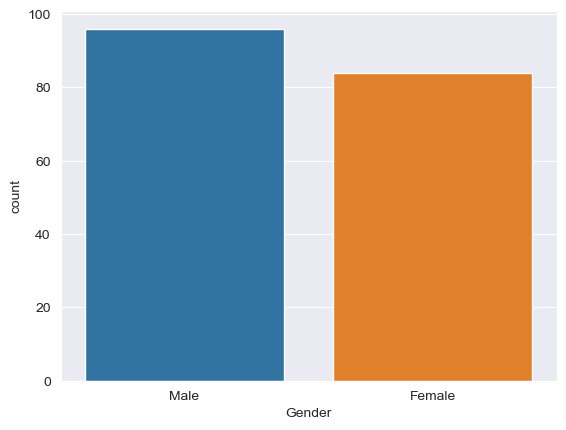

In [32]:
sns.countplot(x='Gender',data=survey_data)
survey_data['Gender'].value_counts()

Text(0.5, 0.98, 'Distribution of Highest Educational Level')

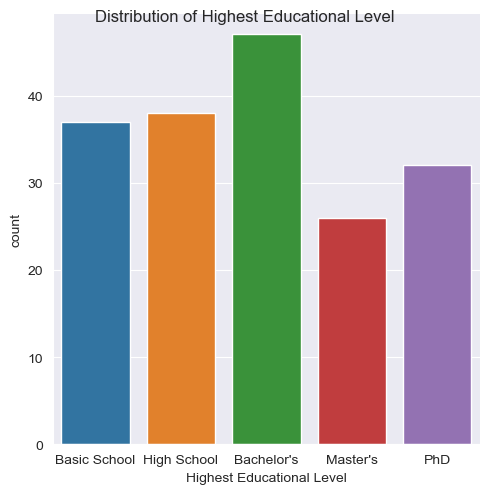

In [34]:

sns.set_style('darkgrid')
category_order = ['Basic School','High School',"Bachelor's","Master's",'PhD']
g=sns.catplot(x='Highest Educational Level',data=survey_data,kind='count',order=category_order)
type(g)
g.fig.suptitle('Distribution of Highest Educational Level')

([0, 1, 2],
 [Text(0, 0, 'MTN'), Text(1, 0, 'Vodafone'), Text(2, 0, 'AirtelTigo')])

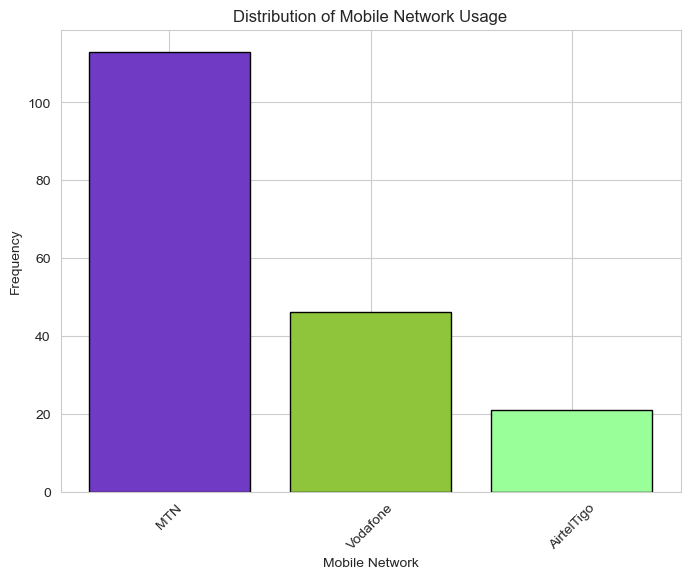

In [9]:
# Count the occurrences of each mobile network provider
network_counts = survey_data['Mobile Network Provider'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(network_counts.index, network_counts.values, color=['#713AC5', '#8EC53A', '#99ff99'], edgecolor='black')
plt.xlabel('Mobile Network')
plt.ylabel('Frequency')
plt.title('Distribution of Mobile Network Usage')
plt.xticks(rotation=45)  # Rotate labels 

Frequency of Mobile Money Use
Daily      158
Weekly      12
Monthly     10
Name: count, dtype: int64


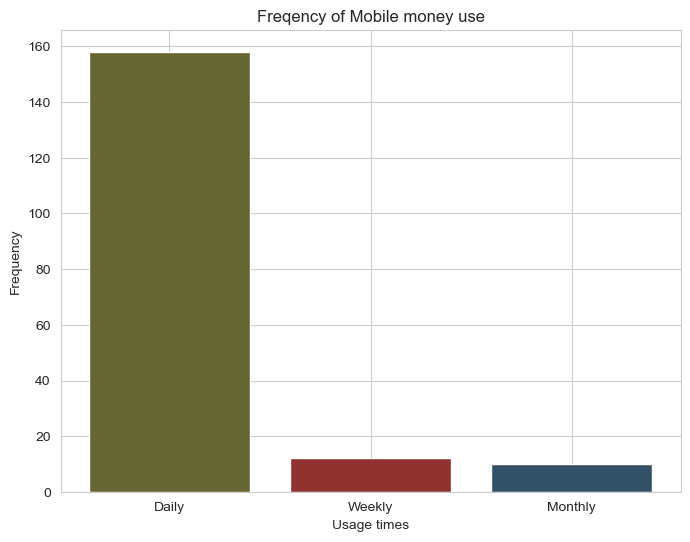

In [10]:
# Calculate counts
counts_momo_use = survey_data['Frequency of Mobile Money Use'].value_counts()
print(counts_momo_use)

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(counts_momo_use.index, counts_momo_use.values, color=['#666633', '#913230','#335166'])  
plt.xlabel('Usage times')
plt.ylabel('Frequency')
plt.title('Freqency of Mobile money use')
plt.show()

In [11]:
print(survey_data['Types of Transactions'].value_counts()) 

Types of Transactions
Sending Money    97
Buying Goods     60
Paying Bills     23
Name: count, dtype: int64


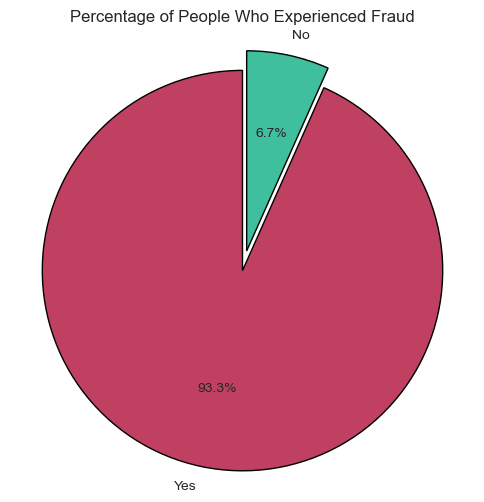

In [12]:
#How many members hasn't experienced mobile money fraud before


percentages_victims=survey_data['Has Experienced Mobile Money Fraud'].value_counts(normalize=True)*100
labels = percentages_victims.index  # 'Yes' and 'No'
sizes = percentages_victims.values  # 93% Yes, 7% No
colors = ['#BF4061', '#40BF9E']  # Custom colors for the chart

plt.figure(figsize=(6, 6))  # Set figure size
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, 
        wedgeprops={'edgecolor': 'black'}, explode=(0.1, 0))  # Explode 'Yes' for emphasis
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of People Who Experienced Fraud')
plt.show()


Type of Fraud Encountered
Fake Promotions           83
Phishing                  43
Unauthorized Transfers    36
Identity Theft            17
No                         1
Name: count, dtype: int64


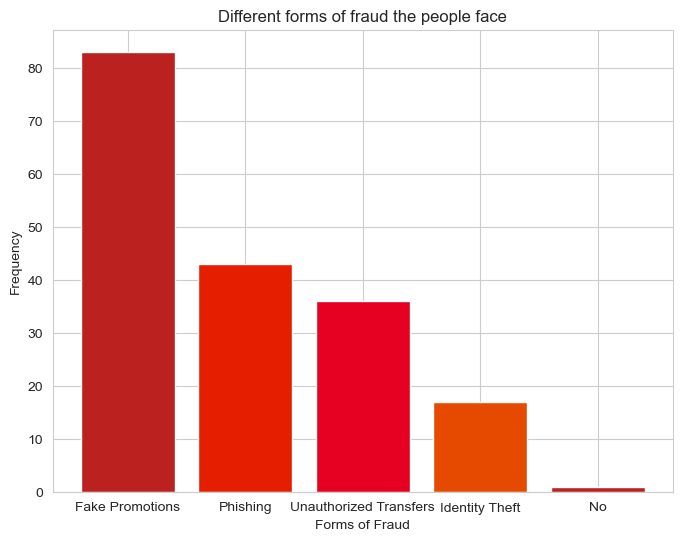

In [13]:
#type of fraud encountered 
fraud_type=survey_data['Type of Fraud Encountered'].value_counts()
print(fraud_type)

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(fraud_type.index, fraud_type.values, color=['#BB221F', '#E51E00', '#E60021', '#E64900'])  
plt.xlabel('Forms of Fraud')
plt.ylabel('Frequency')
plt.title('Different forms of fraud the people face')
plt.show()

How Fraud was Detected
Bank Alert               4
Missing Money          174
Suspicious Activity      2
dtype: int64


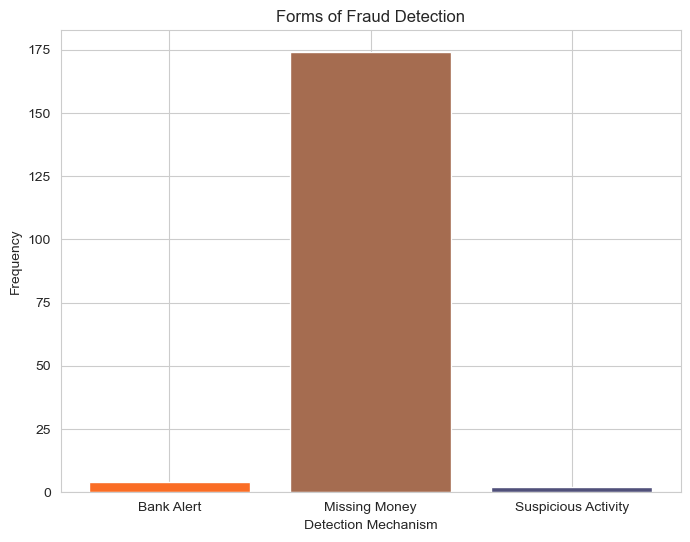

In [14]:
#how was the fraud detected
# Group by 'How Fraud was Detected' and count occurrences
fraud_detection = survey_data.groupby('How Fraud was Detected').size()

# Print the grouped data
print(fraud_detection)

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(fraud_detection.index, fraud_detection.values, color=['#FA6D25', '#A56C50', '#50507A'])
plt.xlabel('Detection Mechanism')
plt.ylabel('Frequency')
plt.title('Forms of Fraud Detection')
plt.show()

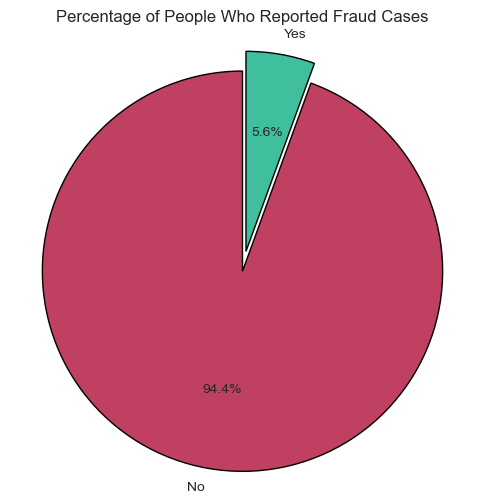

In [15]:
#how many report fraud cases
survey_data.head(2)
fraud_report= survey_data['Reported the Fraud'].value_counts()


# Prepare labels and sizes
labels = fraud_report.index  # 'Yes' and 'No'
sizes = fraud_report.values  # Percentages
colors = ['#BF4061', '#40BF9E']  # Custom colors for the chart

# Plotting the pie chart
plt.figure(figsize=(6, 6))  # Set figure size
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, 
        wedgeprops={'edgecolor': 'black'}, explode=(0.1, 0))  # Explode 'Yes' for emphasis
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of People Who Reported Fraud Cases')
plt.show()

Resolution
No    180
Name: count, dtype: int64


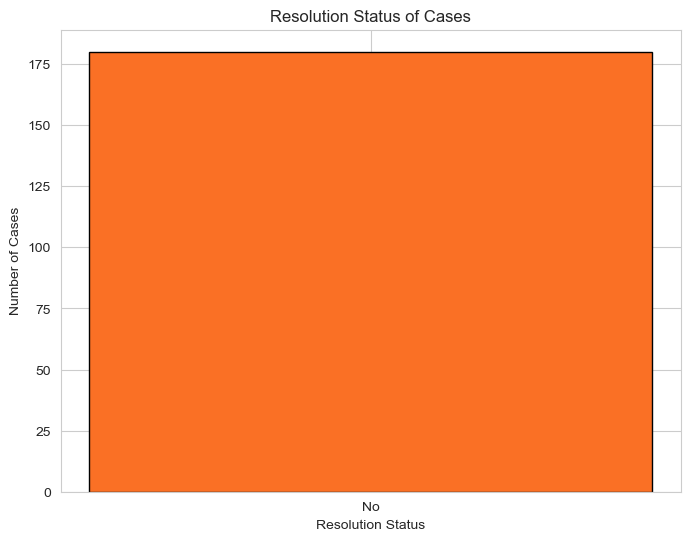

In [16]:
#Why do many victims not report fraud cases?
victims_resolution=survey_data['Resolution'].value_counts()
print(victims_resolution)

plt.figure(figsize=(8, 6))
plt.bar(victims_resolution.index, victims_resolution.values, color=['#FA7025','#50A5A2'] ,edgecolor='black')
plt.xlabel('Resolution Status')
plt.ylabel('Number of Cases')
plt.title('Resolution Status of Cases')
plt.show()

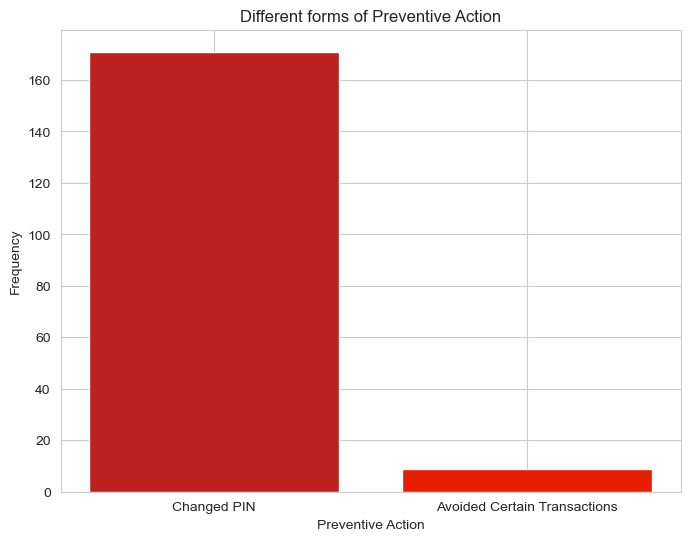

In [17]:
action = survey_data['Preventative Actions Taken After Fraud'].value_counts()
# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(action.index, action.values, color=['#BB221F', '#E51E00', '#E60021', '#E64900'])  
plt.xlabel('Preventive Action')
plt.ylabel('Frequency')
plt.title('Different forms of Preventive Action')
plt.show()

# Outcome from the above analysis, 
It can be observed that mobile money has become a part of people's lives in the community and the country at large for daily transactions but unfortunately, others have decided to manipulate the service for their evil good.<br>
A larger percentage of the sample do not report the fraud case because, it is never resolved 

RECOMMENDATIONS:

There should be daily and intensive public education on the various forms that these fraud activities take place<br>
My sole aim on this matter is to develop a machine learning algorithm that will be incorporated into the telecommunication networks we have in Ghana that can monitor and automatically prevent suspicious transaction rooting from a suspected fraudulent activity.